# ECCV Analysis

In [32]:
import numpy as np
import pandas as pd
import wandb
import src.viz as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hyperbolic import Hyperbolic
import plotly.io as pio

import src.setcwd

src.setcwd.main()
import os

my_28brains_dir = os.path.dirname(os.getcwd())
print("my28brains_dir: ", my_28brains_dir)

Working directory:  /Users/adelemyers/code/my28brains/src
Directory added to path:  /Users/adelemyers/code/my28brains
Directory added to path:  /Users/adelemyers/code/my28brains/src
Directory added to path:  /Users/adelemyers/code/my28brains/src/notebooks
Directory added to path:  /Users/adelemyers/code/my28brains/src/notebooks/csv
Directory added to path:  /Users/adelemyers/code/my28brains/H2_SurfaceMatch
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression/notebooks
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression/notebooks/csv
my28brains_dir:  /Users/adelemyers/code/my28brains


In [38]:
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("bioshape-lab/my28brains-project_regression")

start_date = pd.to_datetime("2023-02-21")
end_date = pd.to_datetime("2024-03-09")

model_name = "model_2"

desired_tags = {model_name}

summary_list, config_list, name_list = [], [], []
for run in runs: 
    run_tags = set(run.tags)
    
    if pd.to_datetime(run.createdAt) > start_date and desired_tags.issubset(run_tags):
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)
    
        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
              if not k.startswith('_')})
    
        # .name is the human-readable name of the run.
        name_list.append(run.name)

summary_df = pd.DataFrame.from_dict(
    summary_list)
config_df = pd.DataFrame.from_dict(
    config_list)
name_df = pd.DataFrame.from_dict(
    name_list)

runs_df = pd.concat([summary_df, config_df, name_df], axis = 1)

save_path = os.path.join(my_28brains_dir, f"project_regression/notebooks/csv/{model_name}.csv")

runs_df.to_csv(save_path)

# Choose which model to analyze

In [46]:
model_name = "model_2"
# dataset_name = "synthetic_mesh"
dataset_name = "hypersphere"
# dataset_name = "hyperboloid"

path = os.path.join(my_28brains_dir, f"project_regression/notebooks/csv/{model_name}.csv")

df = pd.read_csv(path)
df = df.dropna(axis=1, how='all')


df = df[df["dataset_name"] == dataset_name]

if dataset_name is not "synthetic_mesh":
    df = df[df["synthetic_tan_vec_length"] == 5]



df.head()

,Unnamed: 0,estimator_coef_hat,estimator_coef_err_norm,estimator_intercept_err,X,rmsd_linear,linear_coef_hat,estimator_coef_err_sum,estimator_intercept_err_sum,estimator,...,dataset_name,linear_noise.1,noise_factor.1,space_dimension,project_linear_noise,synthetic_tan_vec_length.1,n_steps,end_shape,start_shape,0
0,0,"[-0.5060339188173368, -0.34627495095676525, 0....",1.451888,"[0.15159232882622026, 0.23484971467412605, -0....","[-0.5, -0.46551724137931033, -0.43103448275862...",1.854464,"[-0.5060339188173368, -0.34627495095676525, 0....",-1.137791,1.610988,LR,...,hypersphere,True,0.6,10.0,False,5.0,NaN,NaN,NaN,run_xm0ohdjk
1,1,"[-0.24561181242968988, -0.15980573689826164, 2...",1.448671,"[0.29477403604249336, 0.19549381204121977, 0.1...","[-0.5, -0.46551724137931033, -0.43103448275862...",1.469493,"[-0.24561181242968988, -0.15980573689826164, 2...",0.195779,1.350637,LR,...,hypersphere,True,0.6,5.0,False,5.0,NaN,NaN,NaN,run_e3ez327q
2,2,"[-0.2730629313285072, 1.1817804161950818, -0.8...",0.776259,"[0.2248061619955214, 0.13192402881776438, 0.13...","[-0.5, -0.46551724137931033, -0.43103448275862...",1.232740,"[-0.2730629313285072, 1.1817804161950818, -0.8...",0.414476,0.667488,LR,...,hypersphere,True,0.6,3.0,False,5.0,NaN,NaN,NaN,run_qg1cil89
3,3,"[-0.2352184632180887, 0.21017199566551908, 1.5...",0.850720,"[-0.07027626718835756, -0.11097197274199289, -...","[-0.5, -0.46551724137931033, -0.43103448275862...",1.067665,"[-0.2352184632180887, 0.21017199566551908, 1.5...",-1.381291,-0.324821,LR,...,hypersphere,True,0.6,2.0,False,5.0,NaN,NaN,NaN,run_km4comur
4,4,"[-1.177667319708397, -0.21016421673276572, 1.1...",0.920760,"[0.1447576290070755, 0.11133064616510968, 0.07...","[-0.5, -0.46551724137931033, -0.43103448275862...",1.330445,"[-1.177667319708397, -0.21016421673276572, 1.1...",0.316904,1.171294,LR,...,hypersphere,True,0.4,10.0,False,5.0,NaN,NaN,NaN,run_nc1i0dpo


In [47]:
df.columns

Index(['Unnamed: 0', 'estimator_coef_hat', 'estimator_coef_err_norm',
       'estimator_intercept_err', 'X', 'rmsd_linear', 'linear_coef_hat',
       'estimator_coef_err_sum', 'estimator_intercept_err_sum', 'estimator',
       'lr_coef_err', 'linear_noise', 'estimator_intercept_hat',
       'estimator_intercept_err_norm', '_step', 'true_coef',
       'lr_duration_time', 'lr_intercept_err_norm', 'synthetic_tan_vec_length',
       '_runtime', '_timestamp', 'rmsd_geodesic', 'estimator_coef_err',
       'geodesic_tol', 'true_intercept', 'lr_intercept_err',
       'linear_intercept_hat', 'lr_intercept_err_sum',
       'estimator_duration_time', 'model', 'noise_factor', 'lr_coef_err_sum',
       '_wandb', 'lr_coef_err_norm', 'line vs geodesic',
       'n_gr_function_evaluations', 'n_gr_jacobian_evaluations',
       'n_gr_iterations', 'estimator_y_prediction_fig', 'n_vertices',
       'estimator_coef_hat_fig', 'true_intercept_fig',
       'mesh_sequence_vertices', 'estimator_intercept_hat_fig

# Plot Results

In [48]:
import glob
import os
import subprocess

import geomstats.backend as gs
import geomstats.visualization as visualization
import matplotlib
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib import animation


COL_TO_TEXT = {
    "diff_seq_per_time_vertex_diameter": "Error per mesh per vertex [% diameter]",
    "diff_seq_duration_per_time_and_vertex": "Time difference [secs] per mesh and vertex",
    "relative_diff_seq_duration": "Time difference per vertex [% line]",
    "n_steps": "Number of steps",
    "n_vertices": "Number of vertices",
    "rmsd": "RMSD",
    "rmsd_linear": "RMSD, linear dist",
    "rmsd_geodesic": "RMSD, geod dist",
    "rmsd_diameter": "RMSD, Line vs. Geodesic (per diameter)",
    "speed": "Speed gain",
    "accuracy": "Accuracy",
    "linear_residuals": "Regression",
    "linear_noise": "Noise",
    "geodesic_coef_err": "Geodesic Coef Error",
    "geodesic_duration_time": "Geodesic Duration Time",
    "noise_factor": "Noise Factor",
    "rmsd_geod": "RMSD, Geodesic Regression",
    "nrmsd_geod": "Normalized RMSD, Geodesic Regression",
    "n_X": "Number of Points",
    "n_geod_iterations": "Number of iterations in GR",
    "estimator": "Estimator",
    "estimator_duration_time": "estimator_duration_time",
    "estimator_coef_err_sum": "Estimator coef error sum",
    "estimator_intercept_err_sum": "Estimator intercept error sum",
}

FONTSIZE = 30

def scatterplot_evaluation(
    df,
    colored_by="noise_factor",
    marked_by="n_steps",
    x_label="n_steps",
    y_label="rmsd_geodesic",
    title = None,
    path = None,
):
    """Scatterplot of results.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe made from wandb with config and results.
    colored_by : string
        Column name to color the points by.
    marked_by : string
        Column name to mark the points by, using different symbols.
    x_label : string
        Column name to plot on the x-axis.
    y_label : string
        Column name to plot on the y-axis.
    """
    df = df.sort_values(by=[marked_by], ascending = False)
    x = df[x_label]
    y = df[y_label]
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["arrow-left", "circle", "square", "arrow-right" ])#"circle", "x-thin", "cross-open", "diamond-tall-open", "square-open"])
    )

    marked_values = [s for s in df[marked_by].values]
    if marked_by == "linear_noise":
        symbol_value_to_legend_value = {
            s: "Linear Noise" if s else "Manifold Noise" for s in df[marked_by].unique()
        }
        marked_values = [
            symbol_value_to_legend_value[s] if ~np.isnan(s) else s
            for s in df[marked_by].values
        ]

    # colored_values = [str(c) for c in df[colored_by].values]
    # if colored_by == "linear_residuals":
    #     color_value_to_legend_value = {
    #         c: "GRLR" if c else "GRGR" for c in df[colored_by].unique()
    #     }
    #     colored_values = [
    #         color_value_to_legend_value[c] if ~np.isnan(c) else c
    #         for c in df[colored_by].values
    #     ]

    colored_values = [str(c) for c in df[colored_by].values]


    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = ['#FF1493', '#3300FF', '#2ca02c', '#4169E1'] #px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=colored_values,
        color_discrete_sequence=color_discrete_sequence,
        symbol=marked_values,
        symbol_map=value_to_symbol,
        # title=title,
    )

    if title is not None:
        fig.update_layout(title=title)

    legend_title = COL_TO_TEXT[colored_by] + ", " + COL_TO_TEXT[marked_by]

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[x_label],
            font=dict(family="CMU", size=FONTSIZE),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[y_label], font=dict(family="CMU", size=FONTSIZE)
        ),
        title_font=dict(family="CMU", size=FONTSIZE),
        xaxis=dict(tickfont=dict(family="CMU", size=FONTSIZE)),
        yaxis=dict(tickfont=dict(family="CMU", size=FONTSIZE)),
        legend=dict(font=dict(family="CMU", size=FONTSIZE), title=legend_title),
        width=1.3*900,
        height=1.5*370,
    )

    fig.update_traces(marker=dict(size=20, opacity=0.5))

    if path is  not None:
        pio.write_image(fig, f"{path}.svg", format="svg")
        pio.write_image(fig, f"{path}.pdf", format="pdf")

    fig.show()
    return fig

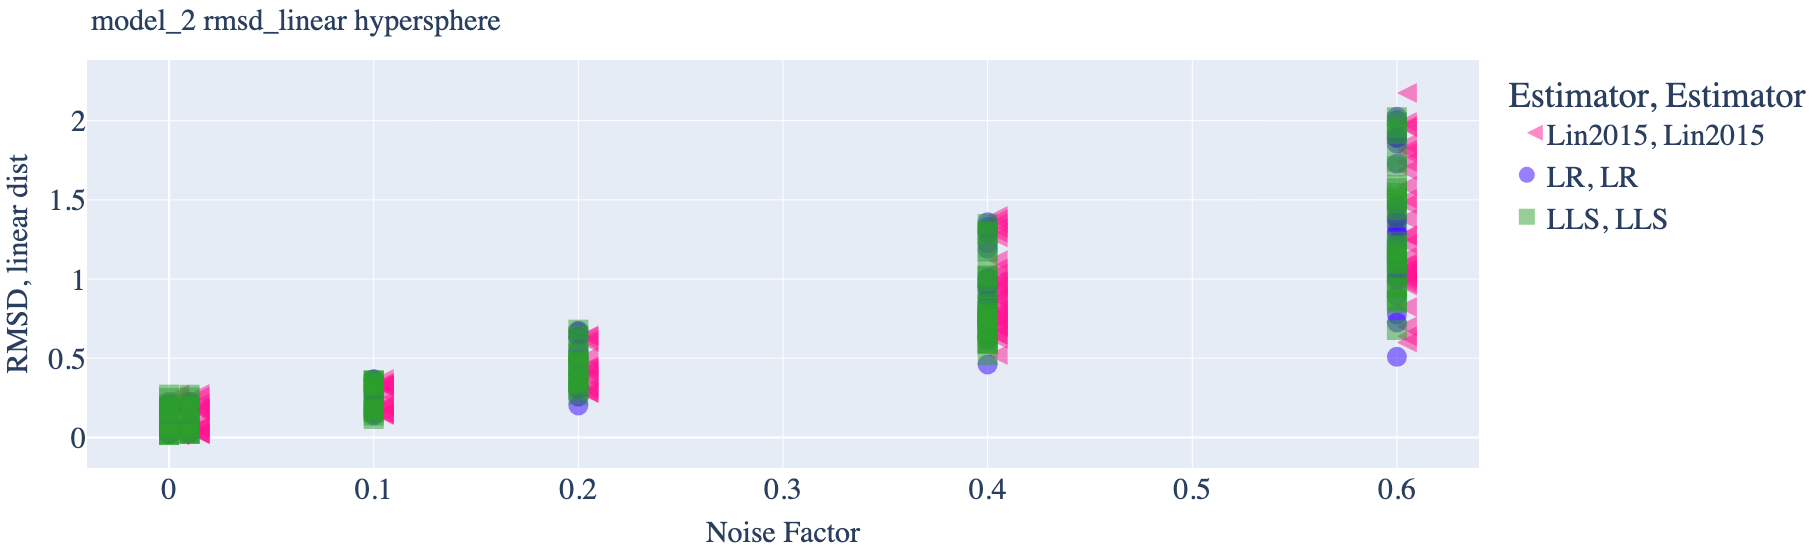

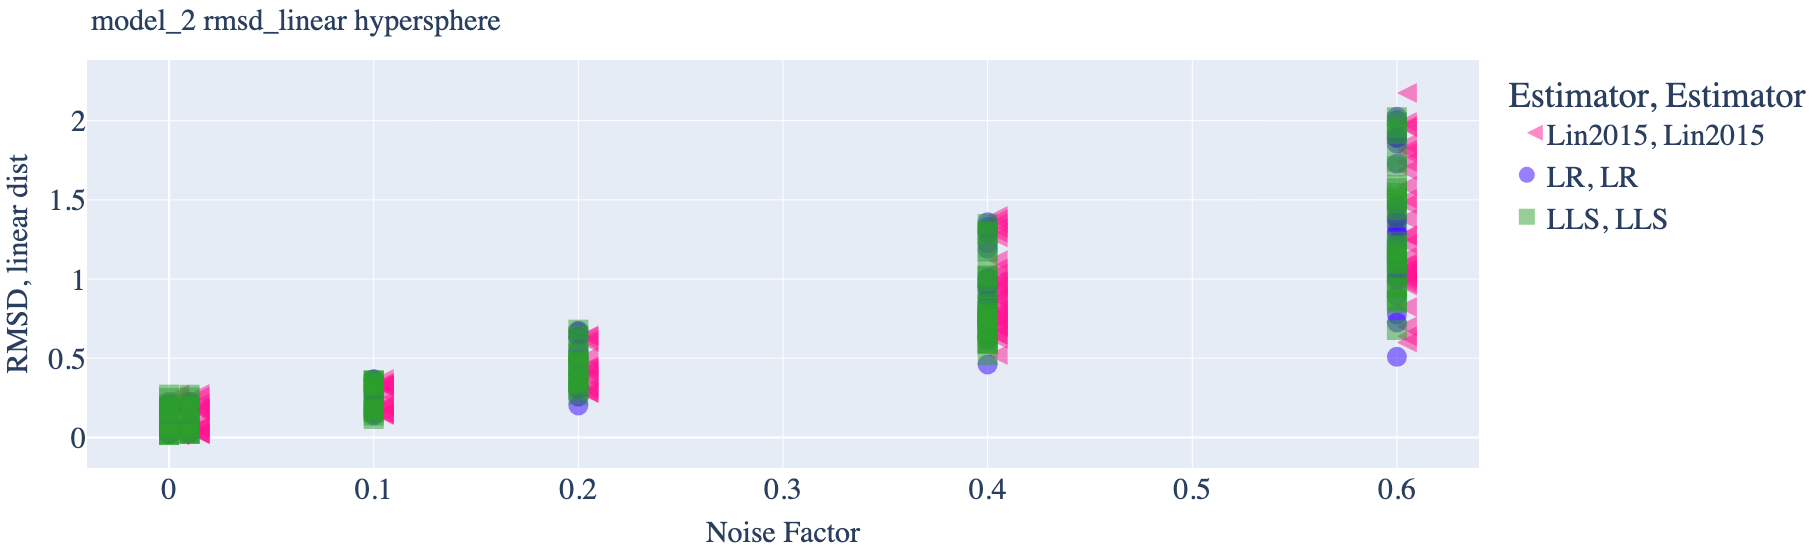

In [49]:
# y_label = "rmsd_geodesic"
y_label = "rmsd_linear"
# y_label = "estimator_duration_time"
# y_label = "estimator_coef_err_sum"
# y_label = "estimator_intercept_err_sum"

if y_label is "rmsd_geodesic":
    fig_path = os.path.join(my_28brains_dir, f"project_regression/notebooks/figs/{model_name}_{dataset_name}_RMSD_no_gls")
elif y_label is "estimator_duration_time":
    fig_path = os.path.join(my_28brains_dir, f"project_regression/notebooks/figs/{model_name}_{dataset_name}_time")
else:
    fig_path = os.path.join(my_28brains_dir, f"project_regression/notebooks/figs/{model_name}_{dataset_name}_{y_label}")

scatterplot_evaluation(
    df= df,
    colored_by="estimator",
    marked_by="estimator",
    x_label="noise_factor",
    y_label=y_label,
    title=f"{model_name} {y_label} {dataset_name}",
    path=fig_path,
)